In [0]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

In [7]:
## Load the Data
## the advertising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radie, tv and newspaper
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [8]:
advert = pd.read_csv('Advertising.csv')
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


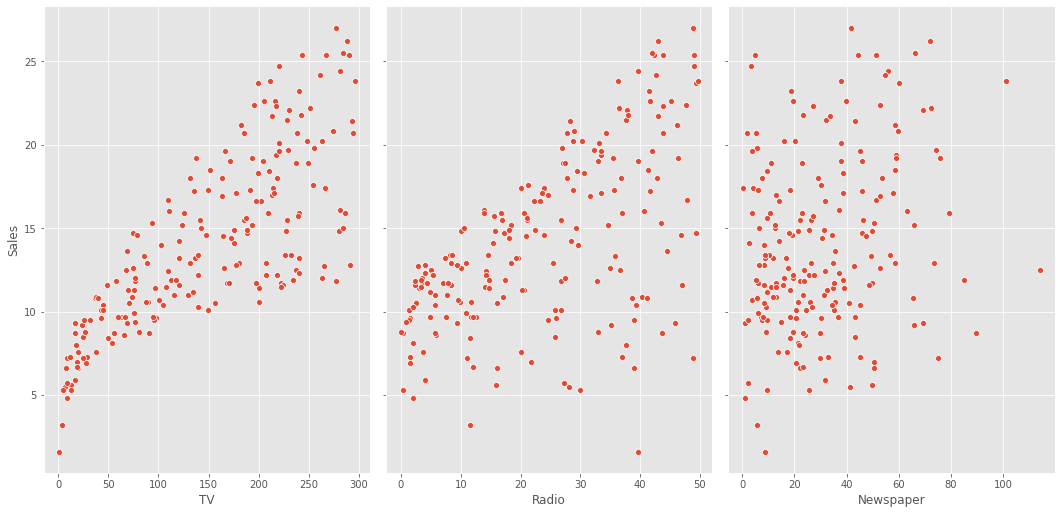

In [14]:
## Relationship between features and response
sns.pairplot(advert, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7);

In [17]:
## Multiple Linear Regression - Estimating Coefficients
from sklearn.linear_model import LinearRegression
x = advert[['TV', 'Radio', 'Newspaper']]
y = advert.Sales 
lm1 = LinearRegression()
lm1.fit(x, y)
print(lm1.intercept_)
print(lm1.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [18]:
list(zip(['TV', 'Radio', 'Newspaper'], lm1.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820448),
 ('Newspaper', -0.0010374930424763285)]

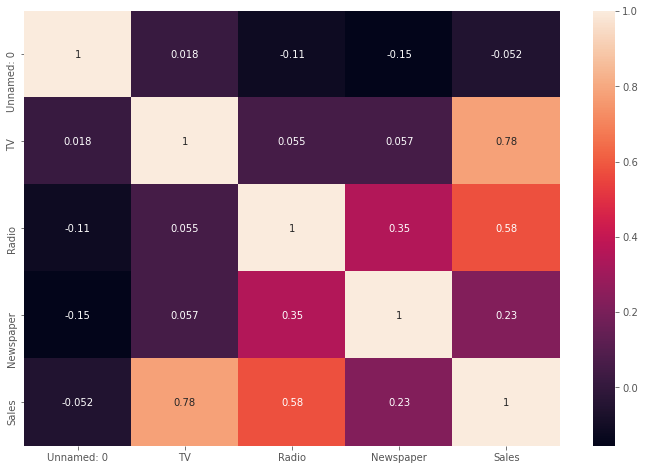

In [19]:
sns.heatmap(advert.corr(), annot=True);

In [20]:
## Feature Selection
from sklearn.metrics import r2_score 
lm2 = LinearRegression().fit(x[['TV', 'Radio']], y)
lm2_preds = lm2.predict(x[['TV', 'Radio']])
print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.8971942610828957


In [21]:
lm3 = LinearRegression().fit(x[['TV', 'Radio', 'Newspaper']], y)
lm3_preds = lm3.predict(x[['TV', 'Radio', 'Newspaper']])
print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.8972106381789522


In [24]:
## Model Evaluation Using Train/Test Split and Metrics
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
x = advert[['TV', 'Radio', 'Newspaper']]
y = advert.Sales
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
lm4 = LinearRegression().fit(x_train, y_train)
lm4_preds = lm4.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE:  1.404651423032895
R^2:  0.9156213613792232


In [25]:
x = advert[['TV', 'Radio']]
y = advert.Sales
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
lm5 = LinearRegression().fit(x_train, y_train)
lm5_preds = lm5.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE:  1.3879034699382888
R^2:  0.9176214942248907


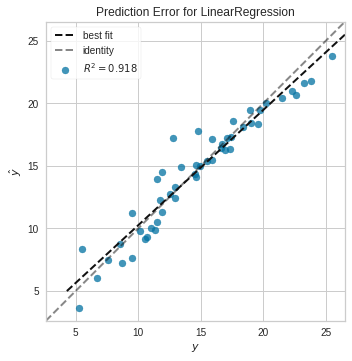

In [27]:
## Visualize the data
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm5).fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof();

In [29]:
## Interaction Effect(Synergy)
advert['interaction'] = advert['TV'] * advert['Radio']
x = advert[['TV', 'Radio', 'interaction']]
y = advert.Sales 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
lm6 = LinearRegression().fit(x_train, y_train)
lm6_preds = lm6.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE:  0.7011871137164328
R^2:  0.978973681468126


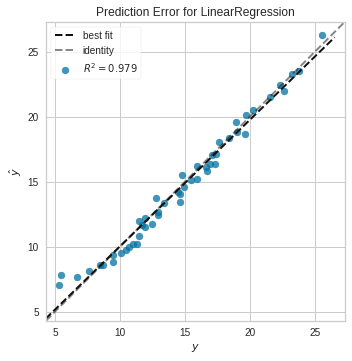

In [30]:
visualizer = PredictionError(lm6).fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof();